In [1]:
# Import libraries
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrmorj/dataset-of-songs-in-spotify")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/mrmorj/dataset-of-songs-in-spotify/versions/1


In [ ]:
import pandas as pd

# Tentukan path ke file dataset (sesuaikan dengan lokasi tepat file CSV yang diunduh)
dataset_path = f"{path}/genres_v2.csv"  # Ganti dengan nama file yang benar jika berbeda

# Load dataset
df = pd.read_csv(dataset_path)

# Tampilkan 5 baris pertama untuk memahami struktur data
df.head()


<ipython-input-4-d1f44fc1ad09>:7: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(dataset_path)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [ ]:
# Pilih kolom yang relevan untuk clustering
features = ['danceability', 'energy', 'loudness', 'valence', 'acousticness','speechiness','instrumentalness','liveness']

# Buat DataFrame baru hanya dengan fitur yang dibutuhkan
df_features = df[features].round(2)
df_features.head()

,danceability,energy,loudness,valence,acousticness,speechiness,instrumentalness,liveness
0,0.83,0.81,-7.36,0.39,0.06,0.42,0.01,0.06
1,0.72,0.49,-7.23,0.12,0.40,0.08,0.00,0.12
2,0.85,0.89,-4.78,0.04,0.01,0.06,0.00,0.37
3,0.48,0.78,-4.71,0.18,0.02,0.10,0.00,0.11
4,0.80,0.62,-7.67,0.59,0.22,0.29,0.00,0.17


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from scipy import stats

# Menghapus outlier berdasarkan Z-score
df_no_outliers = df_features[(np.abs(stats.zscore(df_features)) < 3).all(axis=1)]

# Normalisasi fitur agar memiliki rentang 0-1
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_no_outliers)
df_scaled = pd.DataFrame(df_scaled, columns=features).round(2)
df_scaled.head()

,danceability,energy,loudness,valence,acousticness,speechiness,instrumentalness,liveness
0,0.80,0.76,0.45,0.38,0.10,0.82,0.01,0.07
1,0.67,0.35,0.46,0.10,0.67,0.12,0.00,0.15
2,0.83,0.86,0.60,0.02,0.02,0.08,0.00,0.49
3,0.38,0.72,0.61,0.16,0.03,0.16,0.00,0.14
4,0.77,0.51,0.44,0.59,0.37,0.55,0.00,0.22


In [ ]:
# Reduksi dimensi menggunakan PCA
pca = PCA(n_components=2)  # Menggunakan 2 komponen utama
df_pca = pca.fit_transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2']).round(2)
df_pca.head()  # Tampilkan hasil PCA

,PCA1,PCA2
0,0.83,-0.13
1,1.80,0.41
2,-0.21,-0.24
3,-0.20,-0.22
4,0.88,-0.01


In [ ]:
# Clustering dengan K-Means++
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)
df_pca['cluster'] = kmeans.fit_predict(df_pca)

In [ ]:
# Hitung Silhouette Score untuk evaluasi kualitas clustering
silhouette_avg = silhouette_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.82


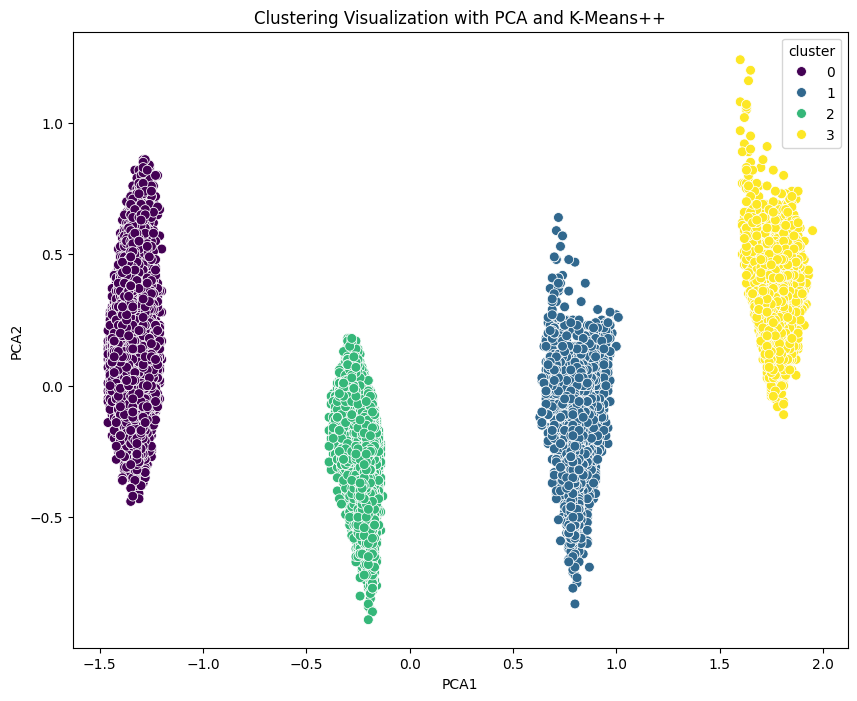

In [ ]:
# Visualisasi hasil clustering dalam 2D
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df_pca, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=50)
plt.title('Clustering Visualization with PCA and K-Means++')
plt.show()

In [ ]:
from sklearn.metrics import davies_bouldin_score

# Menghitung Davies-Bouldin Index untuk hasil clustering
dbi = davies_bouldin_score(df_pca[['PCA1', 'PCA2']], df_pca['cluster'])

# Menampilkan nilai Davies-Bouldin Index
print(f"Davies-Bouldin Index: {dbi:.2f}")

Davies-Bouldin Index: 0.26


In [ ]:
# Menghitung rata-rata nilai fitur di setiap cluster
cluster_means = df_scaled.groupby(df_pca['cluster'])[features].mean().round(2)

# Menampilkan hasil rata-rata nilai fitur per cluster
print("Rata-rata nilai fitur per cluster:")
print(cluster_means)

Rata-rata nilai fitur per cluster:
         danceability  energy  loudness  valence  acousticness  speechiness  \
cluster                                                                       
0                0.56    0.80      0.47     0.27          0.04         0.10   
1                0.70    0.65      0.53     0.59          0.18         0.50   
2                0.44    0.84      0.63     0.28          0.05         0.17   
3                0.65    0.42      0.41     0.30          0.32         0.20   

         instrumentalness  liveness  
cluster                              
0                    0.81      0.25  
1                    0.02      0.26  
2                    0.07      0.32  
3                    0.03      0.19  
